## Открытие файла с данными

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Подготовка данных

### Приведение названий столбцов к нижнему регистру

Приведем все названия столбцов к нижнему регистру:

In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование данных в нужные типы

Проведем проверку столбцов на верный тип данных:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Как видно из полученных данных, некорректный тип данных в столбцах `year_of_release` (год имеет тип данных int, а не float) и `user_score` (оценка пользователей имеет тип данных float, а не object). Проверим столбцы на пропуски перед заменой типа данных:

In [5]:
df['year_of_release'].isna().sum() / df.shape[0]

0.01609332934489979

In [6]:
df['user_score'].isna().sum() / df.shape[0]

0.4008973975471134

Доля пропусков в `year_of_release` составляет примерно 1.6%, можно очистить строки с пропусками, доля же в `user_score` составляет примерно 40.1% - значительная часть, очищать не стоит:

In [7]:
df = df.dropna(subset = ['year_of_release']).reset_index(drop = True)
df['year_of_release'] = df['year_of_release'].astype('int')
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [8]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

При проверке столбца `user_score` была обнаружена аббревиатура "tbd" - вероятно, означает "to be determined" ("будет определено"). Скорее всего это означает, что рейтинг игры игроками еще не определен на момент создания выгрузки данных, при переводе в тип `float` необходимо принудительно заменить его на `nan`:

In [9]:
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Таким образом, типы данных были изменены корректно, можно продолжать предобработку данных.

### Проверка на пропуски и дубликаты

Проведем проверку столбцов на пропуски:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [11]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

Значительные пропуски в столбцах `critic_score`, `user_score` и `rating`, а также по 2 в `name` и `genre`. Удалим строки с пропусками в столбцах `name` и `genre`:

In [12]:
df = df.dropna(subset = ['name', 'genre']).reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Что касается столбцов `critic_score` и `user_score`, они имеют вещественный тип данных - можно поставить заглушку в виде отрицательного числа `-100`, что нельзя делать в `rating`, т.к. его значения относятся к категоральным

In [13]:
df['critic_score'] = df['critic_score'].fillna(-100)
df['user_score'] = df['user_score'].fillna(-100)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Также выполним проверку на дубликаты:

In [14]:
df.duplicated().sum()

0

Таким образом, дубликатов не было выявлено, пропуски, где это было возможно, устранены.

### Определение суммарных продаж во всех регионах

Определим суммарные продажи во всех регионах и добавим их в отдельный столбец `sum_income`:

In [15]:
df['sum_income'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_income
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-100.0,-100.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-100.0,-100.0,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-100.0,-100.0,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-100.0,-100.0,NaN,28.31


In [16]:
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
 11  sum_income       16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных

### Анализ количества игр в разные годы

Создадим график, отражающий количество релизов игр в разные года:

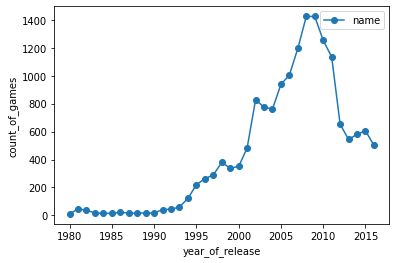

In [17]:
(df
    .pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
    .plot(style = 'o-', ylabel = 'count_of_games'));

С 1980 по 2000 особого скачка роста не неблюдается. Выделим в новом датасете игры, созданные с 2000 года и позднее:

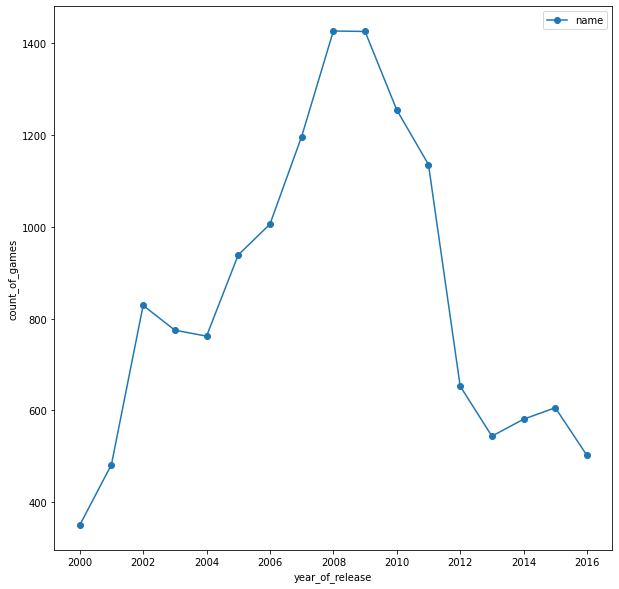

In [18]:
df_yeart_more_than_2000 = df[df['year_of_release'] >= 2000]
(df_yeart_more_than_2000
    .pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
    .plot(style = 'o-', figsize = (10, 10), ylabel = 'count_of_games'));

Из графика следует, что с 2000 по 2008 наблюдается резкий скачок, далее, вплоть до 2016-го, спад. При этом пик приходится на 2008-2009 года, когда отметка превышала 1400 созданных игр в год.

Можем сделать вывод, что года до 2000 нас особо не интересуют. Наиболее важным для нас является период с 2000 по 2016 года.

### Анализ изменений продаж по платформам

Определим ТОП-10 платформ с наибольшими суммарными продажами и создадим список с их названиями:

In [19]:
df_top_10 = (df
    .pivot_table(index = 'platform', values = 'sum_income', aggfunc = 'sum')
    .sort_values(by = 'sum_income', ascending = False)
    .head(10))

df_top_10_list = df_top_10.T.columns.tolist()
df_top_10_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Построим диаграммы распределений по годам:

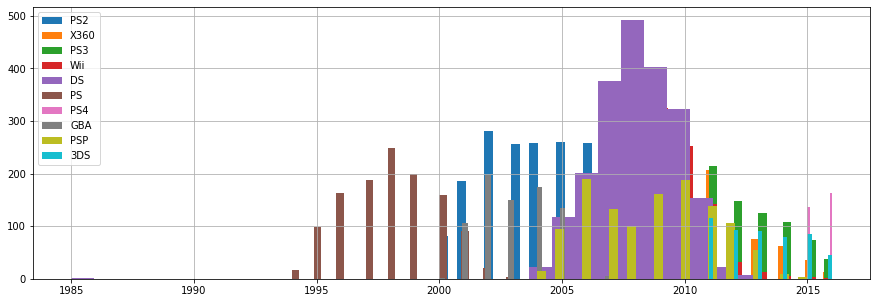

In [20]:
df_top_10_platforms_sum_income = df.query('platform in @df_top_10_list').reset_index(drop = True)

for value in df_top_10_list:
    df_top_10_platforms_sum_income[df_top_10_platforms_sum_income['platform'] == value]['year_of_release'].hist(bins = 30, figsize = (15, 5), label = value);
    plt.legend(loc = 'upper left')

Из полученных гистограмм следует, что примерный период, за который исчезают старые и появляются новые платформы - 5 лет.

### Определение актуального периода прогнозирования

На основе полученных данных по пунктам 3.1 и 3.2 можно сделать выводы: анализ необходимо проводить для временного промежутка, не позднее 2000 года; примерный период актуальности компании - 5 лет. На основе этого примем актуальный период прогнозирования 4 года - с 2013 по 2016 года: можно проследить динамику изменения позиций платформ в игровой индустрии, а также выделить из них наиболее перспективные.



### Создание нового DataFrame с актуальным периодом прогнозирования

В пункте 3.3 был выделен актуальный период прогнозироования - с 2013 по 2016 года. Создадим новый DataFrame, учитывающий этот период:

In [21]:
df_2013_2016 = df.query('year_of_release >= 2013')
df_2013_2016.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_income
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-100.0,-100.0,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-100.0,-100.0,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-100.0,-100.0,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,-100.0,-100.0,NaN,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


### Определение потенциально прибыльных платформ

Увеличим гистограммы из пункта 3.2 с учетом актального периода из пункта 3.3:

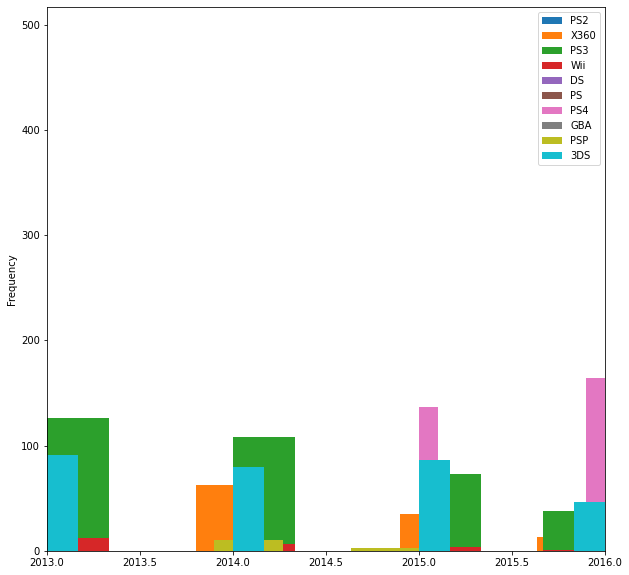

In [22]:
df_top_10_platforms_sum_income = df.query('platform in @df_top_10_list').reset_index(drop = True)

for value in df_top_10_list:
    (df_top_10_platforms_sum_income[df_top_10_platforms_sum_income['platform'] == value]['year_of_release']
         .plot(kind = 'hist', bins = 30, figsize = (10, 10), label = value, xlim = (2013, 2016)))
    plt.legend(loc = 'upper right')

Из полученного результата можем сделать следующие выводы: наиболее перспективная платформа - PS4 (наблюдается рост продаж), далее по убыванию - 3DS, PS3, X360 (наблюдается спад продаж). Таким образом, выделим 3 основные: PS4, 3DS, PS3. 

### Создание графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

Для 3 наиболее перспективных платформ, выделенных в пункте 3.5, создадим "ящики с усами":

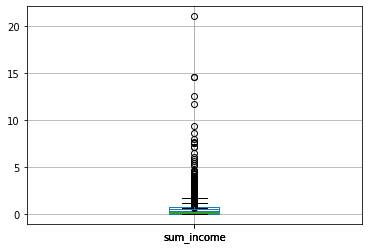

In [23]:
df_2013_2016_income = df_2013_2016[['platform', 'sum_income']]

df_2013_2016_income_PS4 = df_2013_2016_income[df_2013_2016_income['platform'] == 'PS4']
df_2013_2016_income_3DS = df_2013_2016_income[df_2013_2016_income['platform'] == '3DS']
df_2013_2016_income_PS3 = df_2013_2016_income[df_2013_2016_income['platform'] == 'PS3']

list_df_2013_2016_income = [df_2013_2016_income_PS4, df_2013_2016_income_3DS, df_2013_2016_income_PS3]

for index in list_df_2013_2016_income:
    index.boxplot()

Масштабируем диаграммы:

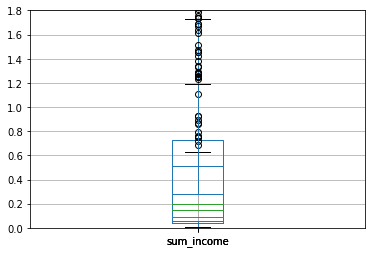

In [24]:
for index in list_df_2013_2016_income:
    index.boxplot()
    plt.ylim(0, 1.8)

In [25]:
df_2013_2016_income_PS4.describe()

,sum_income
count,392.000000
mean,0.801378
std,1.609456
min,0.010000
25%,0.060000
50%,0.200000
75%,0.730000
max,14.630000


In [26]:
df_2013_2016_income_3DS.describe()

,sum_income
count,303.000000
mean,0.472772
std,1.381347
min,0.010000
25%,0.040000
50%,0.090000
75%,0.280000
max,14.600000


In [27]:
df_2013_2016_income_PS3.describe()

,sum_income
count,345.000000
mean,0.525884
std,1.451939
min,0.010000
25%,0.040000
50%,0.150000
75%,0.510000
max,21.050000


Таким образом, для платформы PS4 медианное значение - 0.2, при этом среднее отклонение - примерно 1.61; для платформы 3DS медианное значение - 0.09, при этом среднее отклонение - примерно 1.38, для платформы PS3 медианное значение - 0.15, при этом среднее отклонение - примерно 1.45.

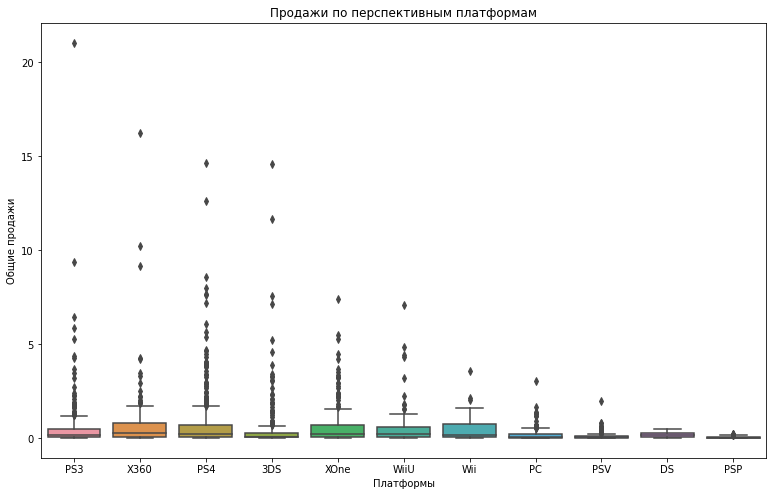

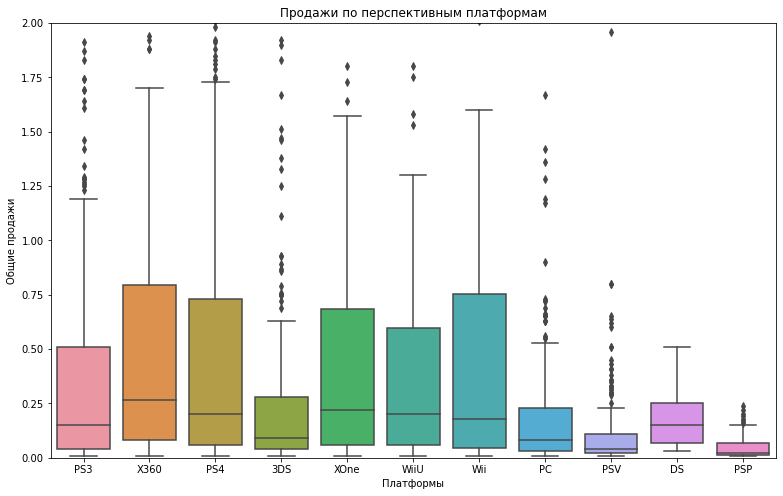

In [28]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = df_2013_2016, y = 'sum_income', x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = df_2013_2016, y = 'sum_income', x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

### Анализ влияния отзывов на продажи внутри одной популярной платформы

Примем за интересующую нас платформу - PS4. Построим для нее диаграммы рассеивания и матрицу корреляций:

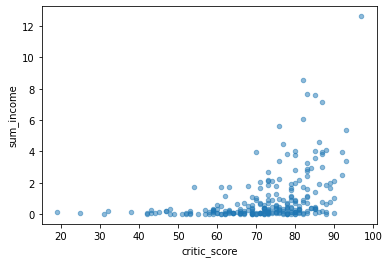

In [29]:
df_2013_2016_score_PS4 = df_2013_2016.query('platform == "PS4"')[['critic_score', 'user_score', 'sum_income']].reset_index(drop = True)
df_2013_2016_score_PS4 = df_2013_2016_score_PS4.query('critic_score > 0 and user_score > 0')
df_2013_2016_score_PS4.plot(kind = 'scatter', x = 'critic_score', y = 'sum_income', alpha = 0.5);

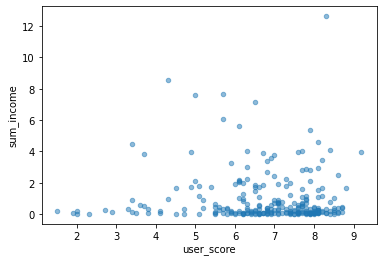

In [30]:
df_2013_2016_score_PS4.plot(kind = 'scatter', x = 'user_score', y = 'sum_income', alpha = 0.5);

In [31]:
df_2013_2016_score_PS4.corr()

,critic_score,user_score,sum_income
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
sum_income,0.405895,-0.033625,1.000000


Таким образом, на период 2013-2016 года зависимость между оценками критиков и продажами слабая (коэффициент корреляции примерно 0.41), зависимости между продажами и оценками пользователей нет.

### Сравнение влияний отзывов PS4 с продажами на других платформах

Для сравнения PS4 с другими платформами определим платформы с наибольшим доходом за период 2013-2016 года:

In [32]:
df_2013_2016_top_platforms = (df_2013_2016
     .pivot_table(index = 'platform', values = 'sum_income', aggfunc = 'sum')
     .sort_values(by = 'sum_income', ascending = False))

df_2013_2016_top_platforms

,sum_income
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Возьмем ТОП-5 платформ по продажам кроме PS4:

In [33]:
df_2013_2016_top_platforms_list = df_2013_2016_top_platforms.T.columns.tolist()[1:6]
df_2013_2016_top_platforms_list

['PS3', 'XOne', '3DS', 'X360', 'WiiU']

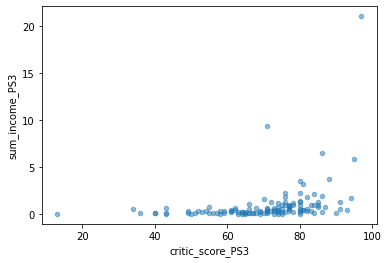

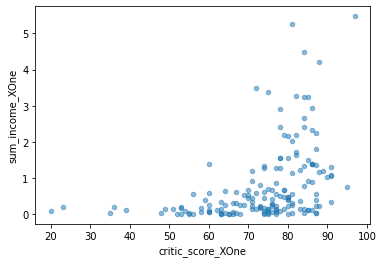

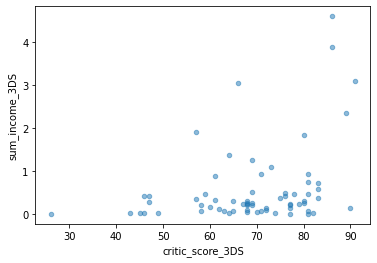

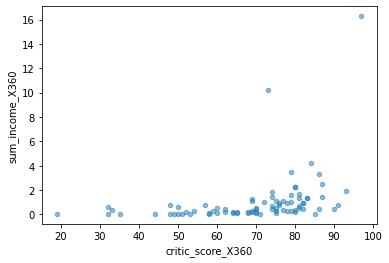

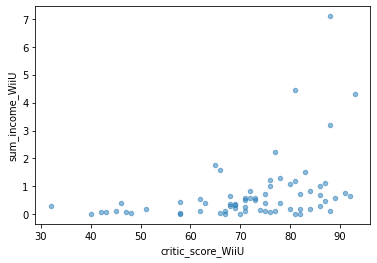

In [34]:
for value in df_2013_2016_top_platforms_list:
    (df_2013_2016
            .query('platform == @value')[['critic_score', 'user_score', 'sum_income']]
            .reset_index(drop = True)
            .query('critic_score > 0 and user_score > 0')
            .plot(kind = 'scatter', x = 'critic_score', 
                  y = 'sum_income', alpha = 0.5, 
                  ylabel = 'sum_income_' + value,
                  xlabel = 'critic_score_' + value))

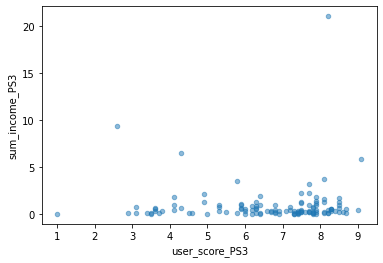

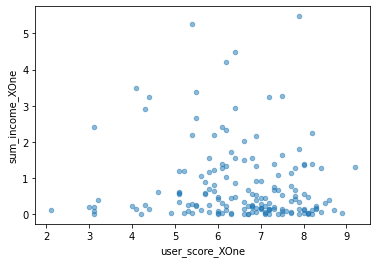

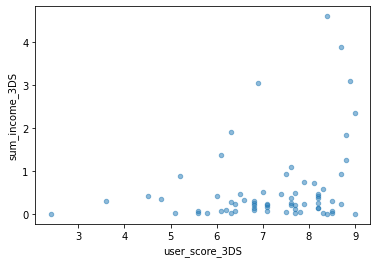

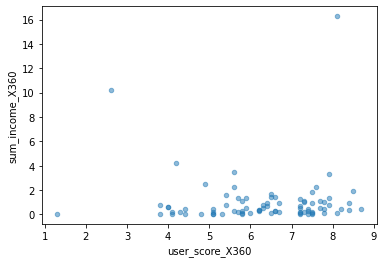

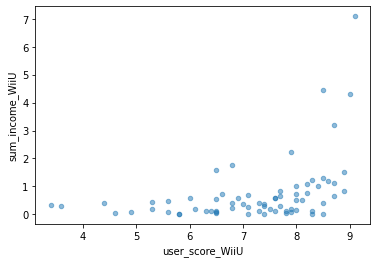

In [35]:
for value in df_2013_2016_top_platforms_list:
    (df_2013_2016
            .query('platform == @value')[['critic_score', 'user_score', 'sum_income']]
            .reset_index(drop = True)
            .query('critic_score > 0 and user_score > 0')
            .plot(kind = 'scatter', x = 'user_score', 
                  y = 'sum_income', alpha = 0.5, 
                  ylabel = 'sum_income_' + value,
                  xlabel = 'user_score_' + value))

In [36]:
for value in df_2013_2016_top_platforms_list:
    
    df_2013_2016_temp = (df_2013_2016
                            .query('platform == @value')[['critic_score', 'user_score', 'sum_income']]
                            .query('critic_score > 0 and user_score > 0'))
    
    display(df_2013_2016_temp.corr())
    print("Платформа " + value)

,critic_score,user_score,sum_income
critic_score,1.000000,0.599920,0.333807
user_score,0.599920,1.000000,0.022691
sum_income,0.333807,0.022691,1.000000


Платформа PS3


,critic_score,user_score,sum_income
critic_score,1.000000,0.472462,0.410422
user_score,0.472462,1.000000,-0.094003
sum_income,0.410422,-0.094003,1.000000


Платформа XOne


,critic_score,user_score,sum_income
critic_score,1.000000,0.769536,0.339235
user_score,0.769536,1.000000,0.272990
sum_income,0.339235,0.272990,1.000000


Платформа 3DS


,critic_score,user_score,sum_income
critic_score,1.000000,0.520946,0.350345
user_score,0.520946,1.000000,-0.006238
sum_income,0.350345,-0.006238,1.000000


Платформа X360


,critic_score,user_score,sum_income
critic_score,1.000000,0.721313,0.379504
user_score,0.721313,1.000000,0.408692
sum_income,0.379504,0.408692,1.000000


Платформа WiiU


Из полученных данных следует, что корреляция между отзывами критиков и продажами слабая (коэффициенты корреляции находятся в интервале от 0.33 до 0.41). Что касается зависимости между отзывами пользователей и продажами, у платформ PS4, PS3, XOne и X360 зависимости нет, у платформ 3DS и WiiU наблюдается слабая корреляция (коэффициенты корреляции 0.27 и 0.41 соответственно).

### Анализ прибыли по жанрам

Определим, какие жанры являются наиболее / наименее продаваемыми.

Создадим сводную таблицу с суммарными продажами:

In [37]:
(df_2013_2016
     .pivot_table(index = 'genre', values = 'sum_income', aggfunc = 'sum')
     .sort_values(by = 'sum_income', ascending = False))

,sum_income
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Для сравнения создадим сводную таблицу по медианным продажам и диаграммы размаха по каждому жанру:

In [38]:
df_2013_2016_genre = (df_2013_2016
                         .pivot_table(index = 'genre', values = 'sum_income', aggfunc = 'median')
                         .sort_values(by = 'sum_income', ascending = False))

df_2013_2016_genre

,sum_income
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


Shooter


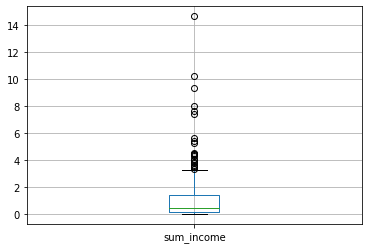

Sports


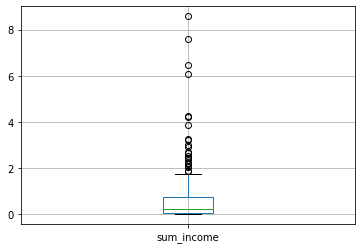

Platform


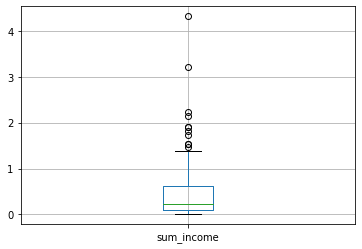

Role-Playing


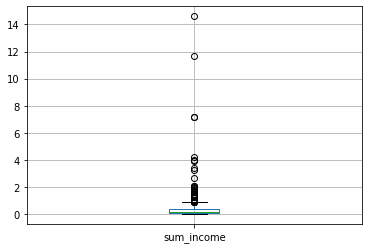

Fighting


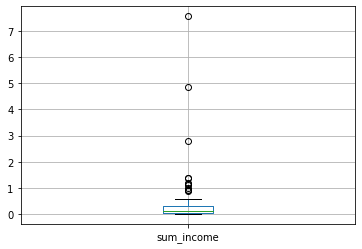

Racing


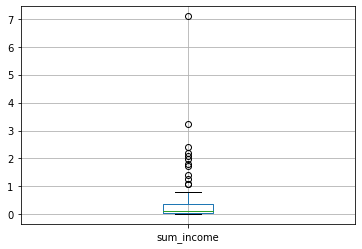

Action


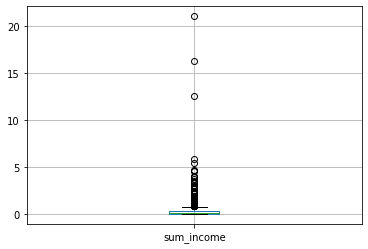

Simulation


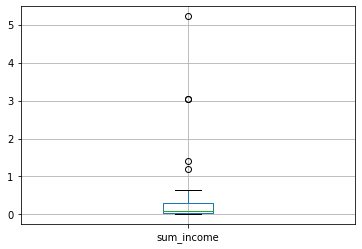

Misc


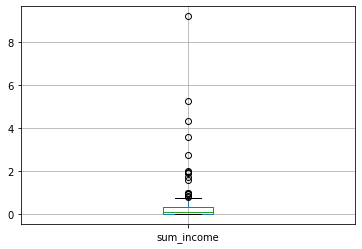

Strategy


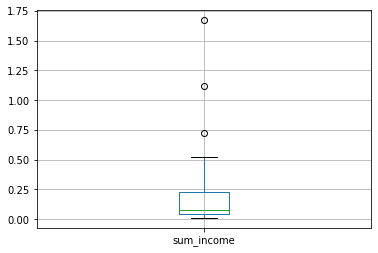

Puzzle


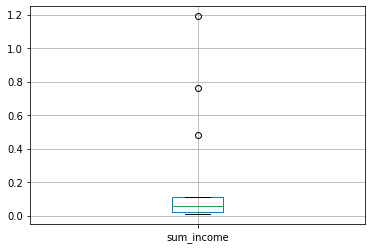

Adventure


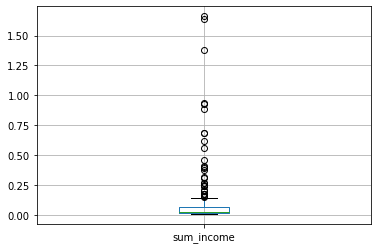

In [39]:
df_2013_2016_genre_list = df_2013_2016_genre.T.columns.tolist()
df_2013_2016_genre_income = df_2013_2016[['genre', 'sum_income']]

for index in df_2013_2016_genre_list:
    
    print(index)
    df_2013_2016_genre_income.query('genre == @index').boxplot()
    plt.show() 

Как видно из результата, необходимо опираться на медианные продажи. К примеру, жанр `Action` по суммарным продажам лидирует (321.87 млн. копий), а его медианные продажи не входят даже в ТОП-5 (0.11 млн.копий), при этом на диаграмме размаха хорошо отражены выбросы, благодаря которым и создается наибольшее число продаж по жанру.

Из полученных данных можно сделать вывод, что наиболее прибыльные жанры - Shooter (медианное значение - 0.45 млн. копий), Sports (медианное значение - 0.24 млн. копий), Platform (медианное значение - 0.225 млн. копий).

## Составление портрета пользователя каждого региона

### Определение самых популярных платформ по регионам

Определим для региона NA самые популярные платформы (ТОП-5):

In [40]:
df_2013_2016_NA_popular = (df_2013_2016
                                 .pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
                                 .sort_values(by = 'na_sales', ascending = False))

df_2013_2016_NA_popular

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


In [41]:
df_2013_2016_NA_popular.T.columns[:5].tolist()

['PS4', 'XOne', 'X360', 'PS3', '3DS']

ТОП-5 самых популярных платформ для региона NA: PS4, XOne, X360, PS3, 3DS.

Определим для региона EU самые популярные платформы (ТОП-5):

In [42]:
df_2013_2016_EU_popular = (df_2013_2016
                                 .pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
                                 .sort_values(by = 'eu_sales', ascending = False))

df_2013_2016_EU_popular

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


In [43]:
df_2013_2016_EU_popular.T.columns[:5].tolist()

['PS4', 'PS3', 'XOne', 'X360', '3DS']

ТОП-5 самых популярных платформ для региона EU: PS4, PS3, XOne, X360, 3DS.

Определим для региона JP самые популярные платформы (ТОП-5):

In [44]:
df_2013_2016_JP_popular = (df_2013_2016
                                 .pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
                                 .sort_values(by = 'jp_sales', ascending = False))

df_2013_2016_JP_popular

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


In [45]:
df_2013_2016_JP_popular.T.columns[:5].tolist()

['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']

ТОП-5 самых популярных платформ для региона JP: 3DS, PS3, PSV, PS4, WiiU.

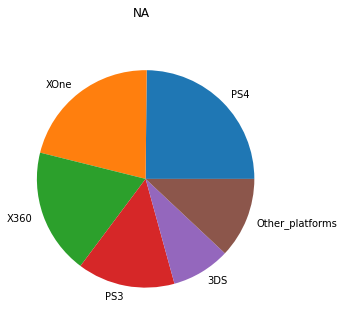

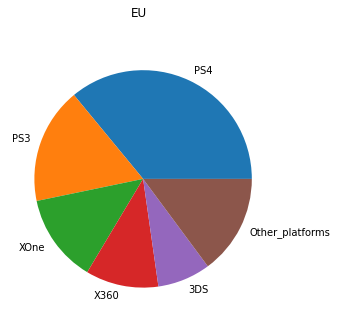

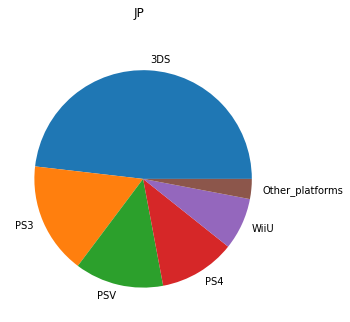

In [46]:
df_2013_2016_NA_popular.loc['Other_platforms', 'na_sales'] = df_2013_2016_NA_popular.loc['WiiU' : 'PSP', 'na_sales'].sum()
df_2013_2016_EU_popular.loc['Other_platforms', 'eu_sales'] = df_2013_2016_EU_popular.loc['PC' : 'PSP', 'eu_sales'].sum()
df_2013_2016_JP_popular.loc['Other_platforms', 'jp_sales'] = df_2013_2016_JP_popular.loc['PSP' : 'PC', 'jp_sales'].sum()

df_2013_2016_NA_popular_plot = (df_2013_2016_NA_popular
         .loc[['PS4', 'XOne', 'X360', 'PS3', '3DS', 'Other_platforms']]
         .plot(kind = 'pie', subplots = True, figsize = (5, 5), title = 'NA', ylabel = '', legend = False))

df_2013_2016_EU_popular_plot = (df_2013_2016_EU_popular
         .loc[['PS4', 'PS3', 'XOne', 'X360', '3DS', 'Other_platforms']]
         .plot(kind = 'pie', subplots = True, figsize = (5, 5), title = 'EU', ylabel = '', legend = False))

df_2013_2016_JP_popular_plot = (df_2013_2016_JP_popular
         .loc[['3DS', 'PS3', 'PSV', 'PS4', 'WiiU', 'Other_platforms']]
         .plot(kind = 'pie', subplots = True, figsize = (5, 5), title = 'JP', ylabel = '', legend = False))

Можно заметить следующее: в регионах NA и EU 1 место по популярности занимает PS4, 2, 3, 4 и 5 - XOne, X360, PS3 и 3DS. Регион же JP в значительной степени отличается от NA и EU: 1 место - 3DS (в NA и JP это 5 место), а PS4, которая занимает в NA и EU 1 место, в JP только 4-е.

### Определение самых популярных жанров по регионам

Определим для региона NA самые популярные жанры (ТОП-5):

In [47]:
df_2013_2016_NA_popular_genre = (df_2013_2016
                                 .pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
                                 .sort_values(by = 'na_sales', ascending = False))

df_2013_2016_NA_popular_genre

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [48]:
df_2013_2016_NA_popular_genre.T.columns[:5].tolist()

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']

ТОП-5 самых популярных жанров для региона NA: Action, Shooter, Sports, Role-Playing, Misc.

Определим для региона EU самые популярные жанры (ТОП-5):

In [49]:
df_2013_2016_EU_popular_genre = (df_2013_2016
                                 .pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
                                 .sort_values(by = 'eu_sales', ascending = False))

df_2013_2016_EU_popular_genre

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


In [50]:
df_2013_2016_EU_popular_genre.T.columns[:5].tolist()

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']

ТОП-5 самых популярных жанров для региона EU: Action, Shooter, Sports, Role-Playing, Racing.

Определим для региона JP самые популярные жанры (ТОП-5):

In [51]:
df_2013_2016_JP_popular_genre = (df_2013_2016
                                 .pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
                                 .sort_values(by = 'jp_sales', ascending = False))

df_2013_2016_JP_popular_genre

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


In [52]:
df_2013_2016_JP_popular_genre.T.columns[:5].tolist()

['Role-Playing', 'Action', 'Misc', 'Fighting', 'Shooter']

ТОП-5 самых популярных жанров для региона JP: Role-Playing, Action, Misc, Fighting, Shooter.

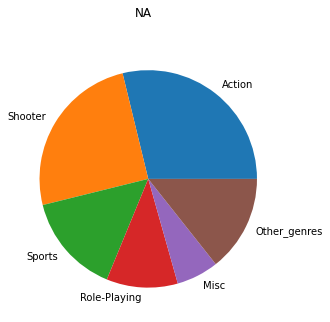

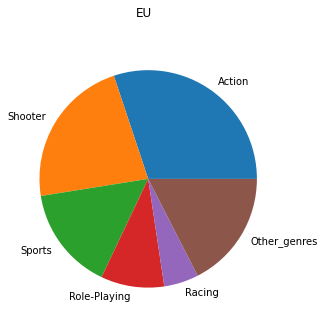

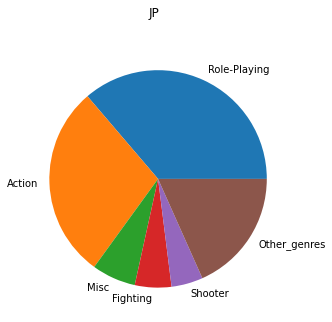

In [53]:
df_2013_2016_NA_popular_genre.loc['Other_genres', 'na_sales'] = df_2013_2016_NA_popular_genre.loc['Platform' : 'Puzzle', 'na_sales'].sum()
df_2013_2016_EU_popular_genre.loc['Other_genres', 'eu_sales'] = df_2013_2016_EU_popular_genre.loc['Misc' : 'Puzzle', 'eu_sales'].sum()
df_2013_2016_JP_popular_genre.loc['Other_genres', 'jp_sales'] = df_2013_2016_JP_popular_genre.loc['Adventure' : 'Puzzle', 'jp_sales'].sum()

df_2013_2016_NA_popular_genre_plot = (df_2013_2016_NA_popular_genre
         .loc[['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc', 'Other_genres']]
         .plot(kind = 'pie', subplots = True, figsize = (5, 5), title = 'NA', ylabel = '', legend = False))

df_2013_2016_EU_popular_genre_plot = (df_2013_2016_EU_popular_genre
         .loc[['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing', 'Other_genres']]
         .plot(kind = 'pie', subplots = True, figsize = (5, 5), title = 'EU', ylabel = '', legend = False))

df_2013_2016_JP_popular_genre_plot = (df_2013_2016_JP_popular_genre
         .loc[['Role-Playing', 'Action', 'Misc', 'Fighting', 'Shooter', 'Other_genres']]
         .plot(kind = 'pie', subplots = True, figsize = (5, 5), title = 'JP', ylabel = '', legend = False))

В регионах NA и EU ТОП-4 совпадают: Action, Shooter, Sports, Role-Playing, 5 место разнится (в NA - Misc, в EU - Racing). В JP же 1 место занимает Role-Playing, что в NA и EU - 4-е, 2-е - Action, что в NA и EU - 1-е, 3-е - Misc, что в EU - 5-е, а в NA вообще не входит в ТОП, 4-е - Fighting - в NA и EU не входит в ТОП, 5-е - Shooter, что в NA и EU - 2-е.

### Анализ влияния рейтинга ESRB на продажи

Создадим сводную таблицу с суммарными продажами по регионам по рейтингу ESRB:

In [54]:
df_2013_2016['rating'] = df_2013_2016['rating'].fillna('not')

/tmp/ipykernel_313/1556276444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013_2016['rating'] = df_2013_2016['rating'].fillna('not')


In [55]:
df_2013_2016_NA_ESRB = (df_2013_2016
                                 .pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
                                 .sort_values(by = 'na_sales', ascending = False))

df_2013_2016_EU_ESRB = (df_2013_2016
                                 .pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
                                 .sort_values(by = 'eu_sales', ascending = False))

df_2013_2016_JP_ESRB = (df_2013_2016
                                 .pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
                                 .sort_values(by = 'jp_sales', ascending = False))

df_2013_2016_ESRB = df_2013_2016_NA_ESRB.merge(df_2013_2016_EU_ESRB, on = 'rating')
df_2013_2016_ESRB = df_2013_2016_ESRB.merge(df_2013_2016_JP_ESRB, on = 'rating')
df_2013_2016_ESRB

,na_sales,eu_sales,jp_sales
rating,,,
M,165.21,145.32,14.11
not,89.42,78.91,85.05
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
T,49.79,41.95,20.59


Исходя из того, что рейтинг ESRB предназначен для маркировки игр для США и Канады, в первую очередь обратим внимание на регион NA: большинство игр имеют рейтинг "М" - предназначен для лиц от 18 лет, однако на 2 месте по продажам занимают игры, не имеющий рейтинга. Этому есть 2 причины: либо игра еще не имеет рейтинга, либо был допущен пропуск.

В регионе EU ситуация примерно такая же, как и в NA. Вероятно, это произошло из-за того, что у регионов NA и EU очень большие сходства по жанрам и платформам. А JP совершенно разнится с NA и EU и по жанрам, и по платформам, поэтому отсутствие рейтинга не влияет на продажи в этом регионе.

In [56]:
temp = df_2013_2016.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


not     977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

## Проверка гипотез

### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую гипотезу таким образом: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

Тогда альтернативная гипотеза будет таковой: средние пользовательские рейтинги платформ Xbox One и PC отличаются. 

Создадим 2 датасета со средними пользовательскими рейтингами для платформ `XOne` и `PC`:

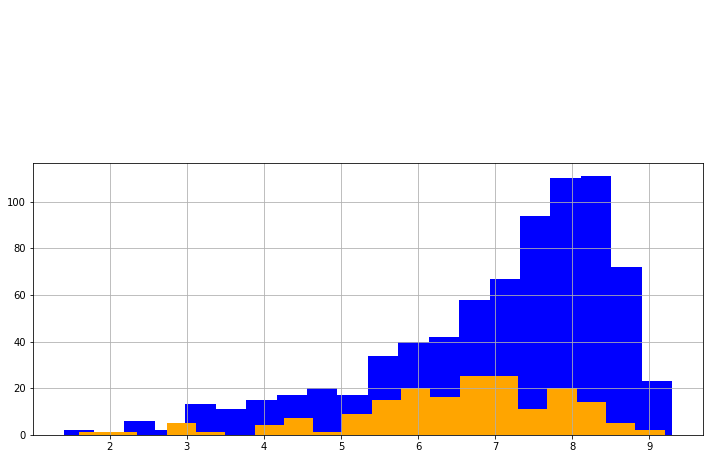

In [57]:
df_hypoth1 = df[['platform', 'user_score']]

df_hypoth1_XOne = (df_hypoth1
                     .query('platform == "XOne"')
                     .query('user_score > 0')
                     .reset_index(drop = True)['user_score'])

df_hypoth1_PC = (df_hypoth1
                     .query('platform == "PC"')
                     .query('user_score > 0')
                     .reset_index(drop = True)['user_score'])

df_hypoth1_PC.hist(bins = 20, color = 'blue', figsize = (12, 5)).annotate('PC', (1.2, 180), color = 'blue');
df_hypoth1_XOne.hist(bins = 20, color = 'orange', figsize = (12, 5)).annotate('XOne', (1.2, 160), color = 'orange');

Проведем тест на проверку гипотезы, определим значение `alpha` как `0.05`:

In [58]:
results_hypoth1 = st.ttest_ind(df_hypoth1_XOne, df_hypoth1_PC, equal_var = False)
alpha = 0.05

print('p-значение:', results_hypoth1.pvalue)

if results_hypoth1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


Таким образом, нулевая гипотеза была отвергнута - средние пользовательские рейтинги платформ `Xbox One` и `PC` отличаются.

### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую гипотезу таким образом: средние пользовательские рейтинги жанров `Action` и `Sports` одинаковые.

Тогда альтернативная гипотеза будет таковой: средние пользовательские рейтинги жанров `Action` и `Sports` отличаются.

Создадим 2 датасета со средними пользовательскими рейтингами для жанров `Action` и `Sports`:

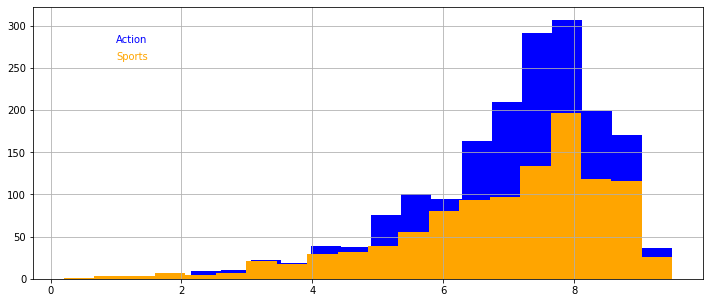

In [59]:
df_hypoth2 = df[['genre', 'user_score']]

df_hypoth2_Action = (df_hypoth2
                             .query('genre == "Action"')
                             .query('user_score > 0')
                             .reset_index(drop = True)['user_score'])

df_hypoth2_Sports = (df_hypoth2
                             .query('genre == "Sports"')
                             .query('user_score > 0')
                             .reset_index(drop = True)['user_score'])

df_hypoth2_Action.hist(bins = 20, color = 'blue', figsize = (12, 5)).annotate('Action', (1, 280), color = 'blue');
df_hypoth2_Sports.hist(bins = 20, color = 'orange', figsize = (12, 5)).annotate('Sports', (1, 260), color = 'orange');

Проведем тест на проверку гипотезы, определим значение `alpha` как `0.05`:

In [60]:
results_hypoth2 = st.ttest_ind(df_hypoth2_Action, df_hypoth2_Sports, equal_var = False)
alpha = 0.05

print('p-значение:', results_hypoth2.pvalue)

if results_hypoth2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.07370217419278526
Не получилось отвергнуть нулевую гипотезу


Таким образом, нулевая гипотеза была не отвергнута: средние пользовательские рейтинги жанров `Action` и `Sports` не отличаются.

## Выводы

Таким образом, было проведено исследование, в ходе которого были изучены данные, произведена их подготовка, их исследовательский анализ, составлен портрет пользователя каждого региона и проверены гипотезы.

Во время подготовки данных названия столбцрв были приведены к нужному регистру, данные приведены к нужным типам. Была произведена проверка на дубликаты и пропуски. Также были определены суммарные продажи во всех регионах.

Во время исследовательского анализа данных были получены следующие результаты: 

1. Скачок роста игровой индустрии начинается с 2000 года, пик приходится на 2008-2009 года, далее, до 2016-го, наблюдается спад.
2. Период, за который исчезают старые и появляются новые платформы, 5 лет.
3. Актуальный период прогнозирования - с 2013 по 2016 года.
4. 3 основных потенциально прибыльных платформы: PS4, 3DS, PS3.
5. Среди 3 основных потенциально прибыльных платформ наибольший разброс по играм имеет платформа PS4, наименьший - 3DS.
6. Корреляция между отзывами критиков и продажами слабая (коэффициенты корреляции находятся в интервале от 0.33 до 0.41). Что касается зависимости между отзывами пользователей и продажами, у платформ PS4, PS3, XOne и X360 зависимости нет, у платформ 3DS и WiiU наблюдается слабая корреляция (коэффициенты корреляции 0.27 и 0.41 соответственно).
7. Наиболее прибыльные жанры - Shooter (медианное значение - 0.45 млн. копий), Sports (медианное значение - 0.24 млн. копий), Platform (медианное значение - 0.225 млн. копий).

Во время составления портрета пользователя каждого региона были получены следующие результаты: 

1. Наиболее популярные платформы в регионе NA - PS4, XOne, X360, PS3, 3DS, наиболее популярные жанры - Action, Shooter, Sports, Role-Playing, Misc.
2. Наиболее популярные платформы в регионе EU - PS4, PS3, XOne, X360, 3DS, наиболее популярные жанры - Action, Shooter, Sports, Role-Playing, Racing.
3. Наиболее популярные платформы в регионе JP - 3DS, PS3, PSV, PS4, WiiU, наиболее популярные жанры - Role-Playing, Action, Misc, Fighting, Shooter.
4. Исходя из того, что рейтинг ESRB предназначен для маркировки игр для США и Канады, в первую очередь обратим внимание на регион NA: большинство игр имеют рейтинг "М" - предназначен для лиц от 18 лет, однако на 2 месте по продажам занимают игры, не имеющий рейтинга. Этому есть 2 причины: либо игра еще не имеет рейтинга, либо был допущен пропуск. В регионе EU ситуация примерно такая же, как и в NA. Вероятно, это произошло из-за того, что у регионов NA и EU очень большие сходства по жанрам и платформам. А JP совершенно разнится с NA и EU и по жанрам, и по платформам, поэтому отсутствие рейтинга не влияет на продажи в этом регионе.

Во время проверки гипотез были получены следующие результаты:

Первая гипотеза: p-значение составило 4.54e-06, нулевая гипотеза была отвергнута, результат проверки - средние пользовательские рейтинги платформ `Xbox One` и `PC` отличаются.

Вторая гипотеза: p-значение: 0.74, нулевая гипотеза не была отвергнута, результат проверки - средние пользовательские рейтинги жанров `Action` и `Sports` не отличаются.

Таким образом, при планировании потенциально популярного продукта рекламной кампании к нему необходимо предпочтения необходимо отдавать:

1. Платформам PS4, 3DS, PS3, при этом в регионе NA - PS4, в регионе EU - PS4 или PS3, в регионе JP - 3DS
2. Жанру Shooter, как наиболее прибыльному и однуму из самых популярных в NA и EU и входящему в ТОП-5 в JP
3. С рейтингом "M" в NA и EU, в JP не имеет значения
4. На отзывы критиков и игроков не стоит обращать внимание